In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
# path to SC h5ad
path_to_sc = "/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/preprocessing/preprocessSC_pipe/data/h5ad_datasets/processed/cpm/brain_sc_with_metadata_pc_cpm.h5ad"

In [3]:
adata =sc.read_h5ad(path_to_sc)

In [4]:
# Log the data
sc.pp.log1p(adata)

In [5]:
adata.raw = adata # adata.raw now has the logCPM values

In [6]:
# get the highly variable genes for later anlysis
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


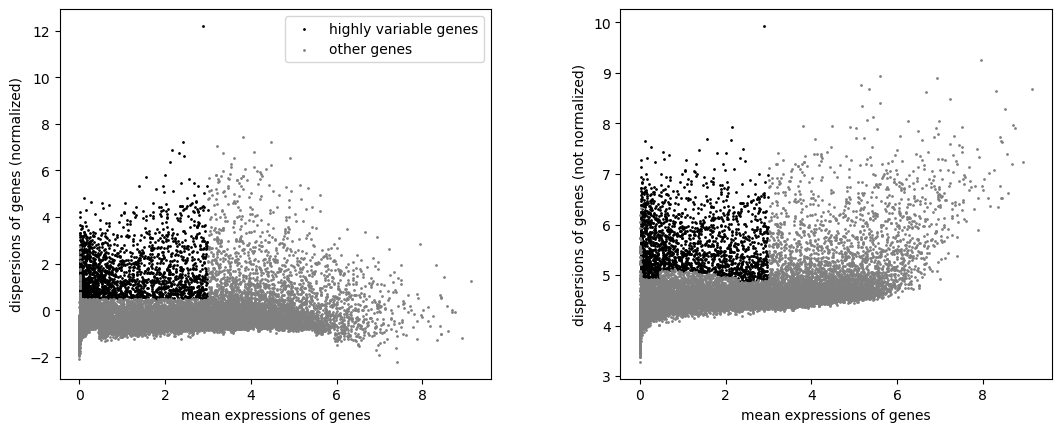

In [7]:
sc.pl.highly_variable_genes(adata)

We have to subset adata for only the highly variable genes

In [8]:
adata = adata[:,adata.var.highly_variable]

In [9]:
adata.X.shape

(76180, 1973)

regress out mitochondrial effects and library size effects. I wont do this beecause I actually think this is biologically relevant for my data

In [10]:
# scale values
# sc.pp.scale(adata, max_value=10)

In [11]:
sc.tl.rank_genes_groups(adata, "Cell type", method='wilcoxon', use_raw=False)

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


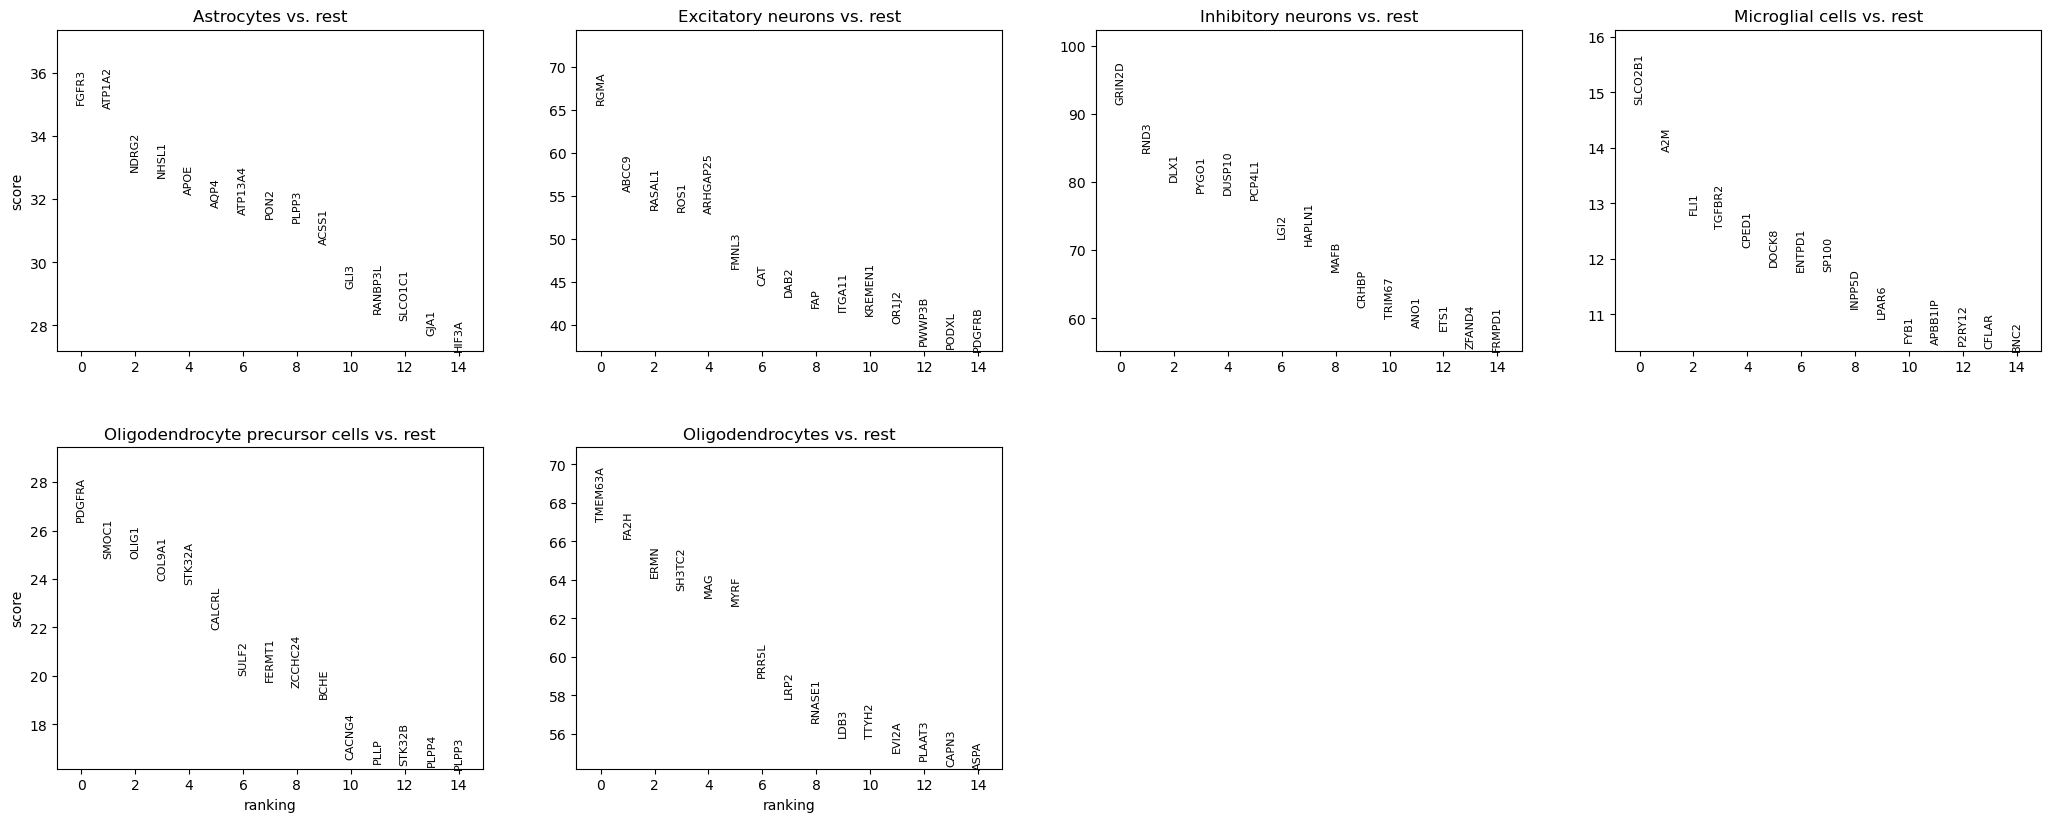

In [12]:
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False, gene_symbols="hgnc_symbol", save='faceted_markers.png')

In [13]:
# get the top 10 marker genes
marker_genes_df = pd.DataFrame(adata.uns['rank_genes_groups']['names'][0:24])
marker_genes_df.to_csv("../../data/brain_marker_genes.csv")

In [14]:
def flatten_dataframe(df):
    flattened_list = []
    for column in df.columns:
        flattened_list.extend(df[column].tolist())
    return flattened_list
marker_genes = flatten_dataframe(marker_genes_df)

In [16]:
dict_of_cts_and_markers = {}
for row_name, row_data in marker_genes_df.T.iterrows():
    adata_var_filtered = adata.var[adata.var_names.isin(row_data)]
    dict_of_cts_and_markers[row_name] = adata_var_filtered.hgnc_symbol.values
    print(adata_var_filtered.hgnc_symbol.values)

    
    

['ATP1A2', 'FGFR3', 'PRODH', 'PON2', 'GLI3', ..., 'ETNPPL', 'RANBP3L', 'HEPACAM', 'NDRG2', 'AQP4']
Length: 24
Categories (1972, object): ['A2M', 'A4GALT', 'AAMDC', 'AASS', ..., 'ZNF676', 'ZNF705G', 'ZNF710', 'ZNF728']
['ROS1', 'ABCC9', 'FAP', 'SGCG', 'RASAL1', ..., 'RGMA', 'KREMEN1', 'AIFM3', 'POU3F2', 'OR1J2']
Length: 24
Categories (1972, object): ['A2M', 'A4GALT', 'AAMDC', 'AASS', ..., 'ZNF676', 'ZNF705G', 'ZNF710', 'ZNF728']
['SLC7A2', 'FRMPD1', 'CACNG4', 'PVALB', 'HRH3', ..., 'PYGO1', 'ZFAND4', 'PRKX', 'MAFB', 'PCP4L1']
Length: 24
Categories (1972, object): ['A2M', 'A4GALT', 'AAMDC', 'AASS', ..., 'ZNF676', 'ZNF705G', 'ZNF710', 'ZNF728']
['CFLAR', 'PRKCH', 'TBXAS1', 'SP100', 'APBB1IP', ..., 'P2RY12', 'BNC2', 'PARP14', 'A2M', 'ZFP36L1']
Length: 24
Categories (1972, object): ['A2M', 'A4GALT', 'AAMDC', 'AASS', ..., 'ZNF676', 'ZNF705G', 'ZNF710', 'ZNF728']
['ARHGAP31', 'CALCRL', 'NTN1', 'CACNG4', 'FERMT1', ..., 'OLIG1', 'SULF2', 'SMOC1', 'PLPP4', 'OLIG2']
Length: 24
Categories (1972, ob

In [17]:
markers_hgnc = pd.DataFrame(dict_of_cts_and_markers)
markers_hgnc.to_csv("../../data/brain_marker_genes_hgnc.csv")

In [26]:
adata.uns['rank_genes_groups']

{'params': {'groupby': 'Cell type',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('ENSG00000068078', 'ENSG00000182175', 'ENSG00000105464', 'ENSG00000137491', 'ENSG00000134853', 'ENSG00000196187'),
            ('ENSG00000018625', 'ENSG00000069431', 'ENSG00000115963', 'ENSG00000175899', 'ENSG00000198732', 'ENSG00000103089'),
            ('ENSG00000165795', 'ENSG00000111344', 'ENSG00000144355', 'ENSG00000151702', 'ENSG00000184221', 'ENSG00000136541'),
            ...,
            ('ENSG00000103257', 'ENSG00000115963', 'ENSG00000069431', 'ENSG00000100142', 'ENSG00000101400', 'ENSG00000183773'),
            ('ENSG00000136250', 'ENSG00000143507', 'ENSG00000111344', 'ENSG00000179292', 'ENSG00000183773', 'ENSG00000182175'),
            ('ENSG00000179292', 'ENSG00000105464', 'ENSG00000182175', 'ENSG00000164877', 'ENSG00000179292', 'ENSG00000103257')],
           dtype=[('Astrocytes', 'O'), ('Exci

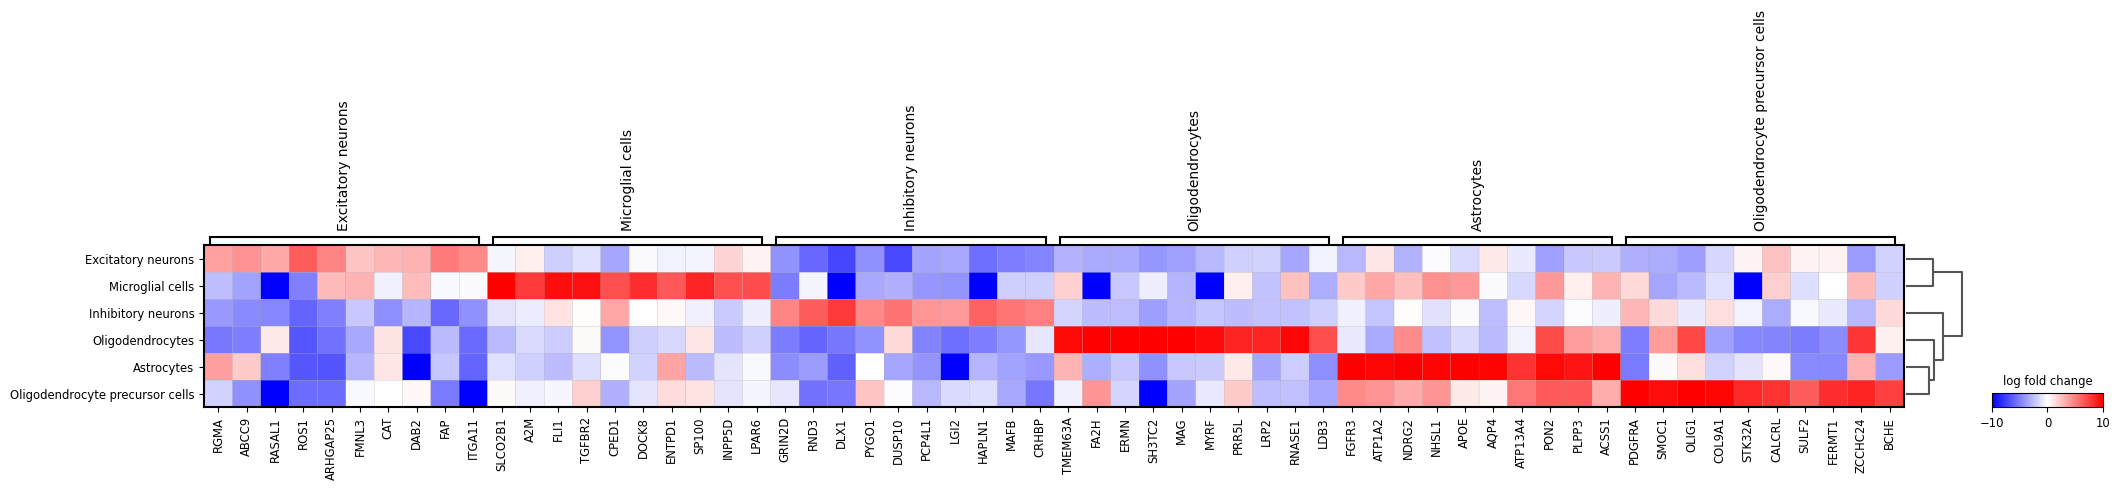

In [38]:
axs = sc.pl.rank_genes_groups_matrixplot(adata,
                                         n_genes=10,
                                         use_raw=False,
										    vmin=-10,
   										 vmax=10,
                                         cmap='bwr',
                                         values_to_plot='logfoldchanges',
                                         gene_symbols = 'hgnc_symbol',
										colorbar_title='log fold change',
                                         save = '10_marker_genes.png')